<a href="https://colab.research.google.com/github/Amimo-cell/datascience/blob/main/Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files


In [2]:
#uploading files from pc
data = files.upload()

Saving WineQT.csv to WineQT.csv


In [3]:
#converting the file into a dataframe
data= pd.read_csv(io.StringIO(data['WineQT.csv'].decode('utf-8')))
#view the dataframe
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
import sklearn as sk
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
SCALE=StandardScaler()

In [5]:
#Linear Regression
from sklearn.linear_model import LinearRegression

In [6]:
#Create the linear regression object
lm = LinearRegression()
lm

LinearRegression()

In [7]:
data['alcohol'] = data['alcohol'].astype(int)

In [8]:
X = data[['alcohol']]
Y = data['quality']

In [9]:
lm.fit(X,Y)

LinearRegression()

In [10]:
Yhat=lm.predict(X)
Yhat[0:5]

array([5.31023103, 5.31023103, 5.31023103, 5.31023103, 5.31023103])

In [11]:
#What is the value of the intercept (a)
lm.intercept_

2.194376489196293

In [12]:
#slope of the model
lm.coef_

array([0.34620606])

In [13]:
#Yhat= a + bX

In [14]:
#Quality=lm.intercept_+lm.coef_*X
Yhat= 2.194376489196293 + 0.34620606*data['quality']

In [15]:
#Multiple linear regression
#Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4

In [16]:
z = data[['fixed acidity', 'alcohol', 'residual sugar', 'total sulfur dioxide']]

In [17]:
lm.fit(z, data['quality'])

LinearRegression()

In [18]:
lm.intercept_

1.7598018471403196

In [19]:
lm.coef_

array([ 0.06859014,  0.34433906, -0.01332378, -0.00180932])

In [20]:
data['alcohol'] = data['alcohol'].astype(int)
data['residual sugar'] = data['residual sugar'].astype(int)
data['total sulfur dioxide'] = data['total sulfur dioxide'].astype(int)
data['fixed acidity']= data['fixed acidity'].astype(int)

In [21]:
#Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
Yhat = 1.7598018471403196 + 0.06859014*data['fixed acidity'] + 0.34433906*data['alcohol']


In [22]:
#modeling using visualization
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline

(0.0, 8.25)

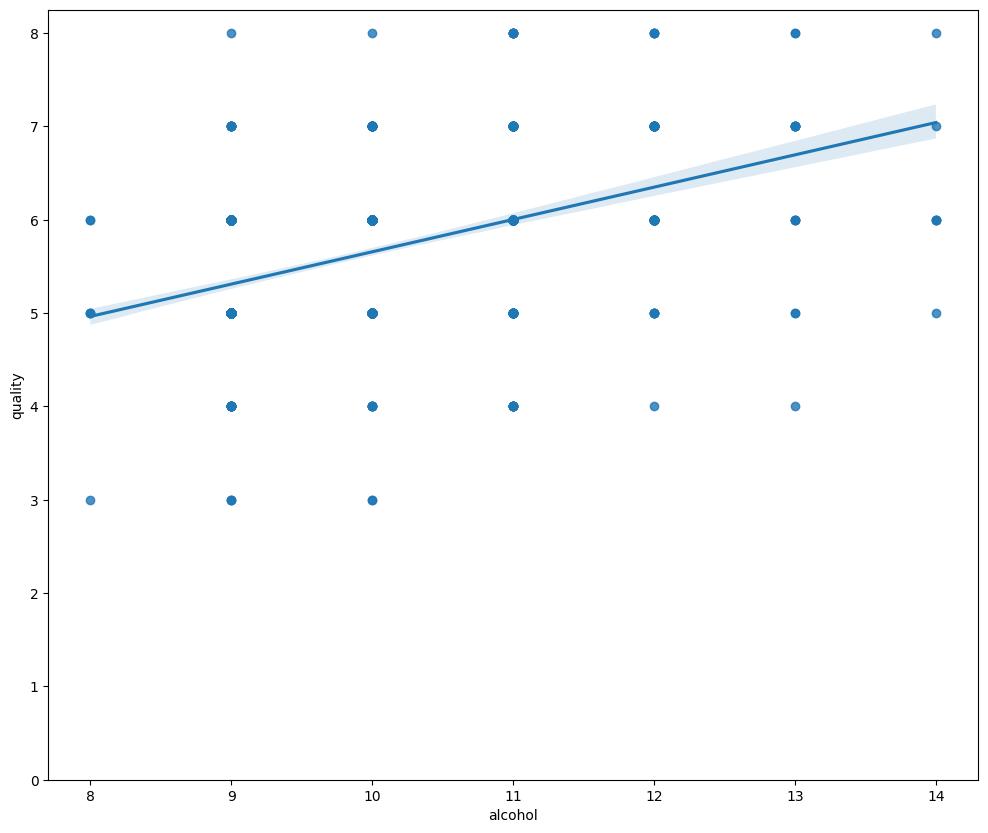

In [23]:
#Regression Plot
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="alcohol", y="quality", data=data)
plt.ylim(0,)

(0.0, 8.25)

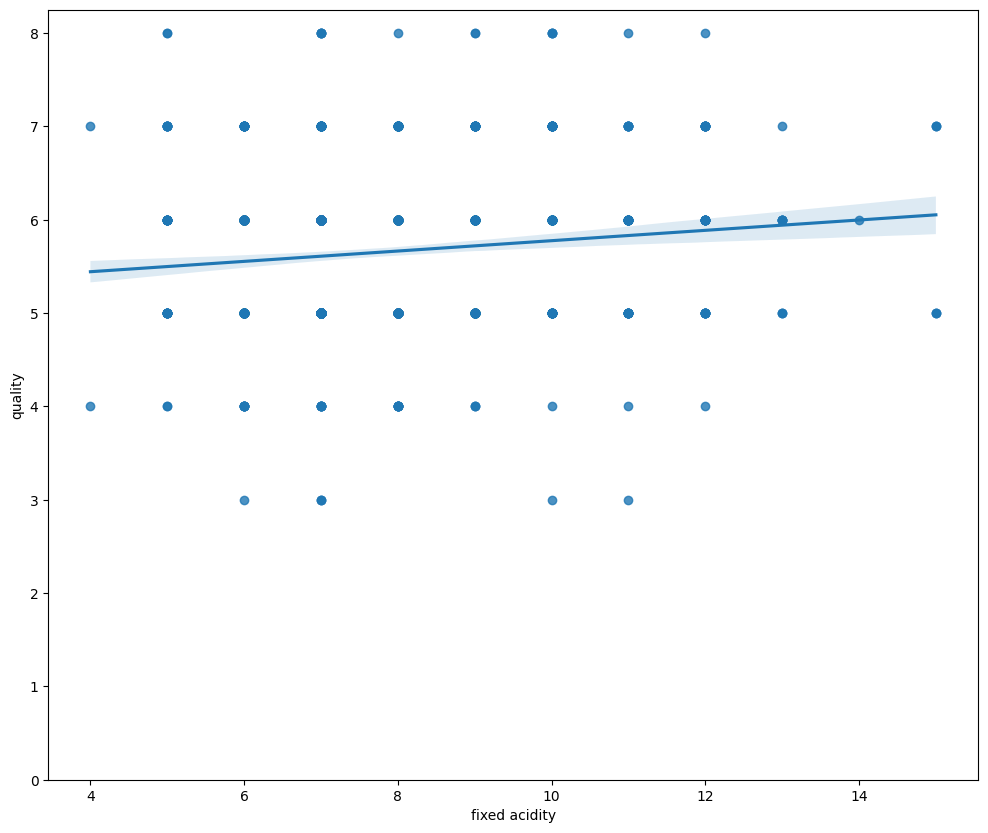

In [24]:
plt.figure(figsize=(width, height))
sns.regplot(x="fixed acidity", y="quality", data=data)
plt.ylim(0,)

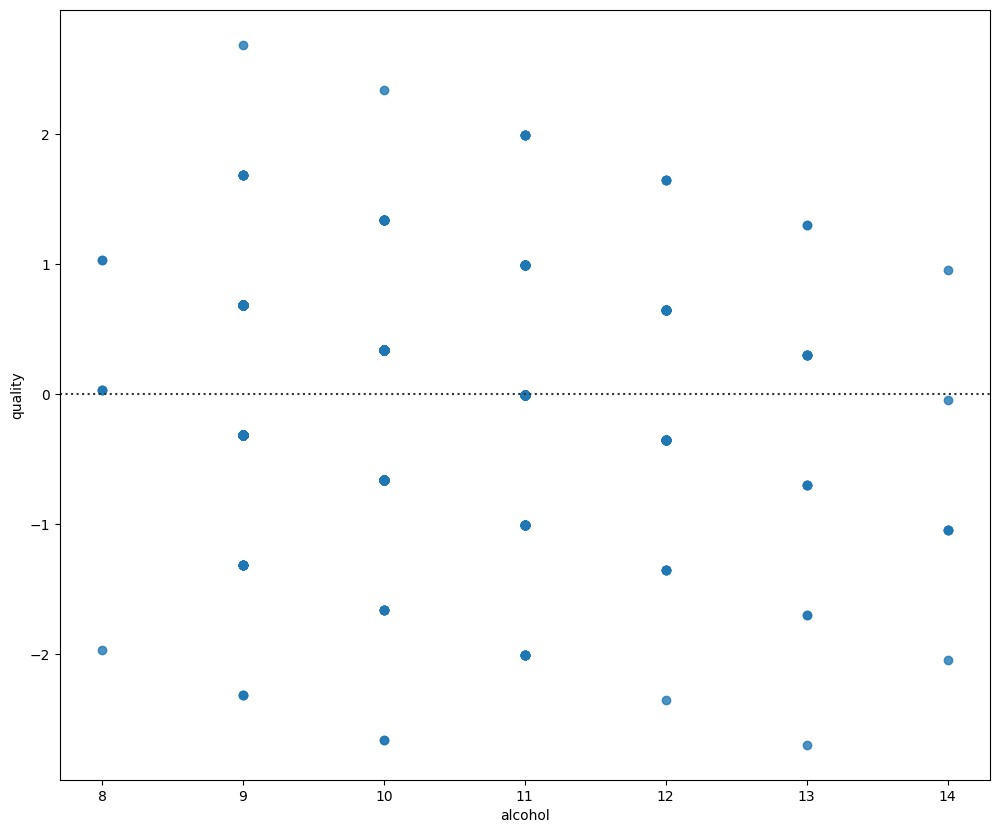

In [25]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=data['alcohol'],y=data['quality'])
plt.show()

In [26]:
Y_hat = lm.predict(z)

<ipython-input-27-ee3208fb9ff1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(data['quality'], hist=False, color="r", label="Actual Value")
<ipython-input-27-ee3208fb9ff1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_hat, hist=False, color="b", label="Fitted Valu

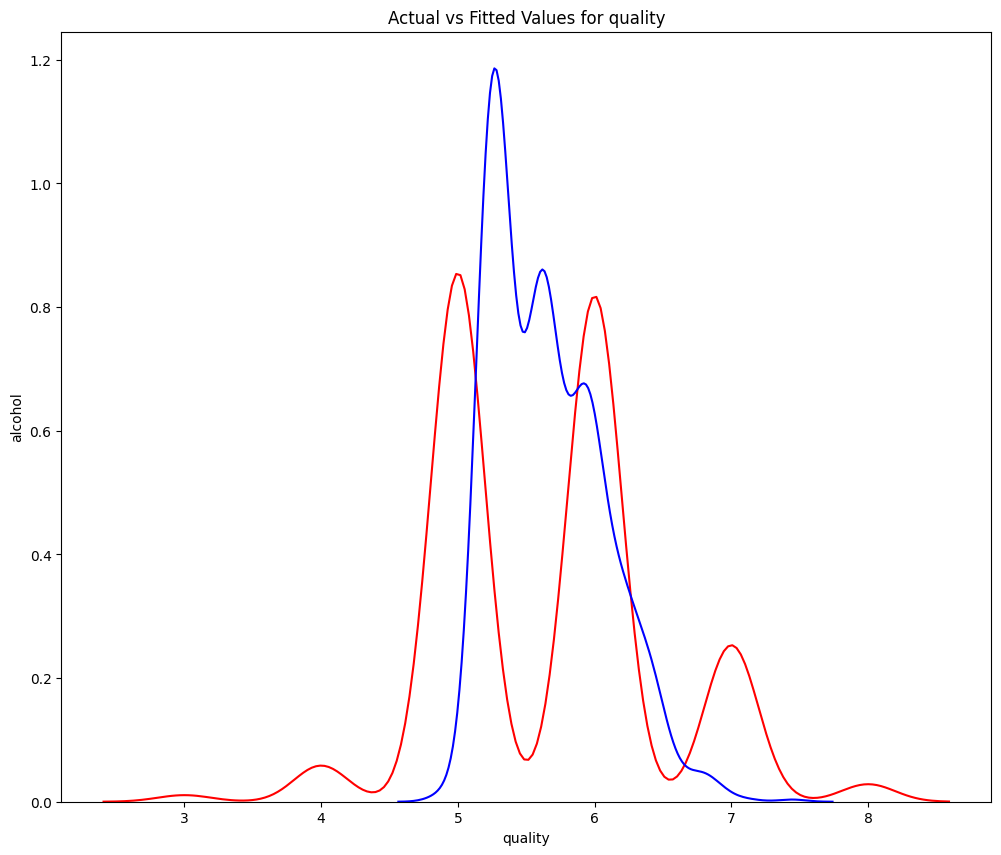

In [27]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(data['quality'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for quality')
plt.xlabel('quality')
plt.ylabel('alcohol')

plt.show()
plt.close()